### EDA Practice Problem 6

In [1]:
# Day 6 – Weather Data 🌦

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("weather.csv", parse_dates=["date"])
df["month"] = df["date"].dt.month

# 1. Average max temp per month
avg_temp = df.groupby("month")["temp_max"].mean()
print("Average Max Temp per Month:\n", avg_temp)

# 2. Hottest day of the year
hottest = df.loc[df["temp_max"].idxmax()]
print("\nHottest Day:", hottest["date"].date(), "Temp:", hottest["temp_max"])

# 3. Group by season → avg rainfall
def season(month):
    if month in [12,1,2]: return "Winter"
    elif month in [3,4,5]: return "Spring"
    elif month in [6,7,8]: return "Summer"
    else: return "Fall"

df["season"] = df["month"].apply(season)
avg_rain = df.groupby("season")["precipitation"].mean()
print("\nAverage Rainfall by Season:\n", avg_rain)

Average Max Temp per Month:
 month
1      8.229032
2      9.860177
3     12.387097
4     15.020000
5     19.295968
6     22.400000
7     25.998387
8     26.112097
9     21.924167
10    16.389516
11    11.023333
12     8.194355
Name: temp_max, dtype: float64

Hottest Day: 2014-08-11 Temp: 35.6

Average Rainfall by Season:
 season
Fall      3.795055
Spring    3.231250
Summer    0.936957
Winter    4.184765
Name: precipitation, dtype: float64


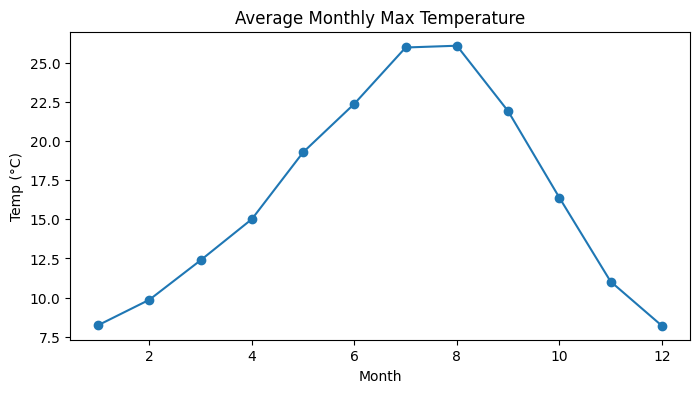

In [2]:
# 4. Line graph: temperature vs month
plt.figure(figsize=(8,4))
df.groupby("month")["temp_max"].mean().plot(marker="o")
plt.title("Average Monthly Max Temperature")
plt.xlabel("Month")
plt.ylabel("Temp (°C)")
plt.show()

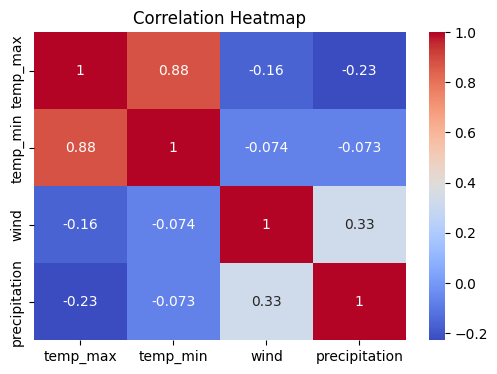

In [3]:
# 5. Heatmap (correlation: temp, wind, precipitation)
plt.figure(figsize=(6,4))
sns.heatmap(df[["temp_max","temp_min","wind","precipitation"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()